In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [14]:
df = pd.read_csv (r"C:\Users\Ssharma\Desktop\DATA_ENGINEERING\project\UPDATED NEW YRK.csv")

In [15]:
df.to_json (r'C:/Users/Ssharma/Desktop/DATA_ENGINEERING/updnycjso.json')

In [16]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [17]:
df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                  int64
congestion_surcharge     float64
dtype: object

In [18]:
df.describe

<bound method NDFrame.describe of      VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0           1             00:09:00              00:10:00                  N   
1           2             00:26:00              00:31:00                  N   
2           2             00:56:00              00:59:00                  N   
3           2             00:26:00              00:40:00                  N   
4           2             00:56:00              00:59:00                  N   
..        ...                  ...                   ...                ...   
794         2             01:31:00              01:40:00                  N   
795         2             01:45:00              01:57:00                  N   
796         2             01:49:00              01:54:00                  N   
797         2             01:07:00              01:32:00                  N   
798         2             01:40:00              01:45:00                  N   

     RatecodeID  

In [71]:
df.head

<bound method NDFrame.head of      VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0           1             00:09:00              00:10:00                  N   
1           2             00:26:00              00:31:00                  N   
2           2             00:56:00              00:59:00                  N   
3           2             00:26:00              00:40:00                  N   
4           2             00:56:00              00:59:00                  N   
..        ...                  ...                   ...                ...   
794         2             01:31:00              01:40:00                  N   
795         2             01:45:00              01:57:00                  N   
796         2             01:49:00              01:54:00                  N   
797         2             01:07:00              01:32:00                  N   
798         2             01:40:00              01:45:00                  N   

     RatecodeID  pick

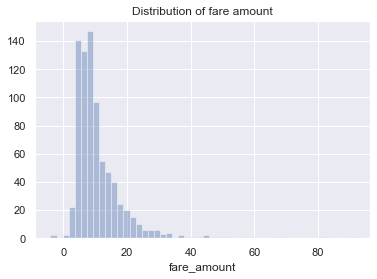

In [20]:
#fare amount
sns.distplot(df['fare_amount'],kde=False)
plt.title('Distribution of fare amount')
plt.show()

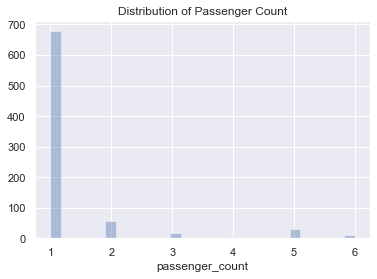

In [21]:
#Passenger Count
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

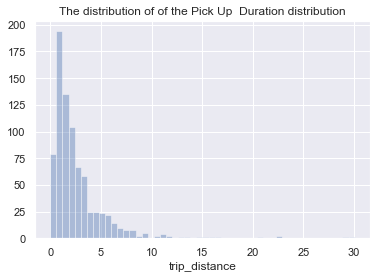

In [22]:

sns.distplot(df['trip_distance'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')

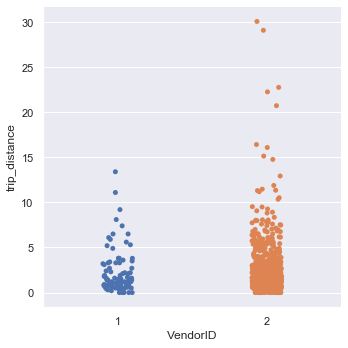

In [76]:
#RELATIONSHIOP BETWEEN vendor id AND TRIP DISTANCE
sns.catplot(x="VendorID", y="trip_distance",kind="strip",data=df)

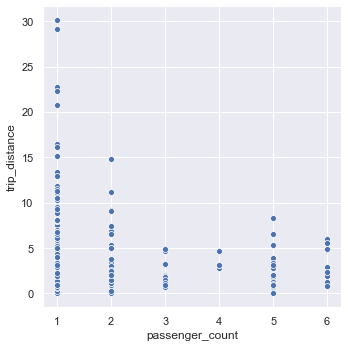

In [24]:
#RELATIONSHIOP BETWEEN PASSENGER COUNT AND TRIP DISTANCE
sns.relplot(x="passenger_count", y="trip_distance", data=df, kind="scatter")

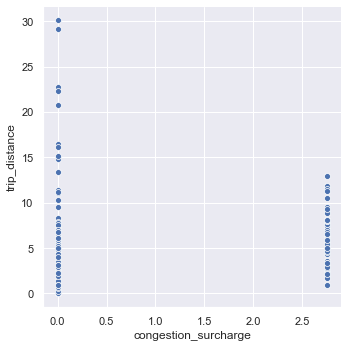

In [53]:
#RELATIONSHIOP BETWEEN distance AND congestion surcharge
sns.relplot(x="congestion_surcharge", y="trip_distance", data=df, kind="scatter")

In [54]:

#LIBRARIES FOR THE LINEAR REGRESSION_ML MODEL FOR NYC TAXI FARE(DEPENDENT) AND DISTANCE(INDEPENDEDENT)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [57]:

#dependent and independent variables
x=df['trip_distance']
y=df['fare_amount']
# Splitting data set into train and test 

x_train, x_test, y_train, y_test = train_test_split(x, y)

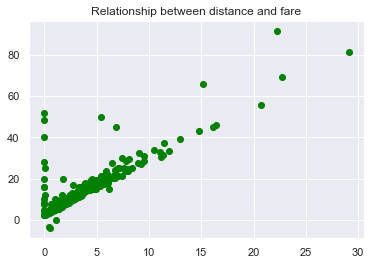

In [59]:
plt.title('Relationship between distance and fare')
plt.scatter(x_train, y_train, color='green')
plt.show()

In [33]:

#FIT THE MODEL TO DATA
lm=linear_model.LinearRegression()
lm.fit(x_train, y_train)
print('Slope:',lm.coef_)
print('Intercept:',lm.intercept_)

Slope: [[2.79995823]]
Intercept: [3.93250986]


In [34]:
#EVALUATE THE MODEL
model_score=lm.score(x_train, y_train)
print('Model score:{:.4f}'.format(model_score))

Model score:0.7763


In [35]:

y_predicted=lm.predict(x_test)

r_squared_score=r2_score(y_test,y_predicted)
print('r square:{:.4f}'.format(r_squared_score))

r square:0.9231


<function matplotlib.pyplot.show(*args, **kw)>

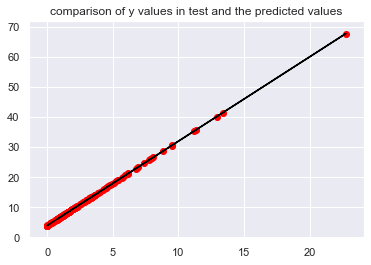

In [36]:
plt.title('comparison of y values in test and the predicted values')
plt.plot(x_test,y_predicted,color='black')
plt.scatter(x_test,y_predicted,color='red')
plt.show

In [84]:

import folium


In [85]:
map_ny = folium.Map(location=[40.728225, -73.98796844])
map_ny

In [17]:
import folium
map_1 = folium.Map(location=[40.767937,-73.982155 ],tiles='OpenStreetMap',
 zoom_start=12)
for each in df[:1000].iterrows():
    folium.CircleMarker([each[1]['pickup_latitude'],each[1]['pickup_longitude']],
                        radius=3,
                        color='green',
                        popup=str(each[1]['pickup_latitude'])+','+str(each[1]['pickup_longitude']),
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1

In [18]:
#Drop-off location for train dataset
import folium # goelogical map
map_3 = folium.Map(location=[40.767937,-73.982155 ],tiles='OpenStreetMap',
 zoom_start=12)
for each in df[:1000].iterrows():
    folium.CircleMarker([each[1]['dropoff_latitude'],each[1]['dropoff_longitude']],
                        radius=3,
                        color='black',
                        popup=str(each[1]['dropoff_latitude'])+','+str(each[1]['dropoff_longitude']),
                        fill_color='#FD8A6C'
                        ).add_to(map_3)
map_3